In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib
import seaborn as sns

from sklearn.model_selection import GroupKFold, LeaveOneGroupOut
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import RadiusNeighborsRegressor

from sklearn.model_selection import train_test_split


## Reading the training data

In [2]:
df = pd.read_csv('/kaggle/input/playground-series-s3e20/train.csv',
                    index_col='ID_LAT_LON_YEAR_WEEK')

In [3]:
feature_columns = ['latitude', 'longitude', 'year', 'week_no',
       'SulphurDioxide_SO2_column_number_density',
       'SulphurDioxide_SO2_column_number_density_amf',
       'SulphurDioxide_SO2_slant_column_number_density',
       'SulphurDioxide_cloud_fraction', 'SulphurDioxide_sensor_azimuth_angle',
       'SulphurDioxide_sensor_zenith_angle',
       'SulphurDioxide_solar_azimuth_angle',
       'SulphurDioxide_solar_zenith_angle',
       'SulphurDioxide_SO2_column_number_density_15km',
       'CarbonMonoxide_CO_column_number_density',
       'CarbonMonoxide_H2O_column_number_density',
       'CarbonMonoxide_cloud_height', 'CarbonMonoxide_sensor_altitude',
       'CarbonMonoxide_sensor_azimuth_angle',
       'CarbonMonoxide_sensor_zenith_angle',
       'CarbonMonoxide_solar_azimuth_angle',
       'CarbonMonoxide_solar_zenith_angle',
       'NitrogenDioxide_NO2_column_number_density',
       'NitrogenDioxide_tropospheric_NO2_column_number_density',
       'NitrogenDioxide_stratospheric_NO2_column_number_density',
       'NitrogenDioxide_NO2_slant_column_number_density',
       'NitrogenDioxide_tropopause_pressure',
       'NitrogenDioxide_absorbing_aerosol_index',
       'NitrogenDioxide_cloud_fraction', 'NitrogenDioxide_sensor_altitude',
       'NitrogenDioxide_sensor_azimuth_angle',
       'NitrogenDioxide_sensor_zenith_angle',
       'NitrogenDioxide_solar_azimuth_angle',
       'NitrogenDioxide_solar_zenith_angle',
       'Formaldehyde_tropospheric_HCHO_column_number_density',
       'Formaldehyde_tropospheric_HCHO_column_number_density_amf',
       'Formaldehyde_HCHO_slant_column_number_density',
       'Formaldehyde_cloud_fraction', 'Formaldehyde_solar_zenith_angle',
       'Formaldehyde_solar_azimuth_angle', 'Formaldehyde_sensor_zenith_angle',
       'Formaldehyde_sensor_azimuth_angle',
       'UvAerosolIndex_absorbing_aerosol_index',
       'UvAerosolIndex_sensor_altitude', 'UvAerosolIndex_sensor_azimuth_angle',
       'UvAerosolIndex_sensor_zenith_angle',
       'UvAerosolIndex_solar_azimuth_angle',
       'UvAerosolIndex_solar_zenith_angle', 'Ozone_O3_column_number_density',
       'Ozone_O3_column_number_density_amf',
       'Ozone_O3_slant_column_number_density',
       'Ozone_O3_effective_temperature', 'Ozone_cloud_fraction',
       'Ozone_sensor_azimuth_angle', 'Ozone_sensor_zenith_angle',
       'Ozone_solar_azimuth_angle', 'Ozone_solar_zenith_angle',
       'UvAerosolLayerHeight_aerosol_height',
       'UvAerosolLayerHeight_aerosol_pressure',
       'UvAerosolLayerHeight_aerosol_optical_depth',
       'UvAerosolLayerHeight_sensor_zenith_angle',
       'UvAerosolLayerHeight_sensor_azimuth_angle',
       'UvAerosolLayerHeight_solar_azimuth_angle',
       'UvAerosolLayerHeight_solar_zenith_angle', 'Cloud_cloud_fraction',
       'Cloud_cloud_top_pressure', 'Cloud_cloud_top_height',
       'Cloud_cloud_base_pressure', 'Cloud_cloud_base_height',
       'Cloud_cloud_optical_depth', 'Cloud_surface_albedo',
       'Cloud_sensor_azimuth_angle', 'Cloud_sensor_zenith_angle',
       'Cloud_solar_azimuth_angle', 'Cloud_solar_zenith_angle']

### Lets list all the columns in our training data
We have around 75 columns for our data
We have `latitude`, `longitude`, `year`, `week_no`, 70 other features and `emission`

For the other 70 features, they correct to these features
- Sulphur Dioxide - COPERNICUS/S5P/NRTI/L3_SO2
- Carbon Monoxide - COPERNICUS/S5P/NRTI/L3_CO
- Nitrogen Dioxide - COPERNICUS/S5P/NRTI/L3_NO2
- Formaldehyde - COPERNICUS/S5P/NRTI/L3_HCHO
- UV Aerosol Index - COPERNICUS/S5P/NRTI/L3_AER_AI
- Ozone - COPERNICUS/S5P/NRTI/L3_O3
- Cloud - COPERNICUS/S5P/OFFL/L3_CLOUD


For each feature like SulphurDioxide, CarbonMonoxide: we have sub features.

If we take Sulphur dioxide, we have

SulphurDioxide_SO2_column_number_density,
SulphurDioxide_SO2_column_number_density_amf,
SulphurDioxide_SO2_slant_column_number_density,
SulphurDioxide_cloud_fraction,
SulphurDioxide_sensor_azimuth_angle,
SulphurDioxide_sensor_zenith_angle,
SulphurDioxide_solar_azimuth_angle,
SulphurDioxide_solar_zenith_angle,
SulphurDioxide_SO2_column_number_density_15km,



In [4]:
for i, column in enumerate(df.columns):
    print(i, column)

0 latitude
1 longitude
2 year
3 week_no
4 SulphurDioxide_SO2_column_number_density
5 SulphurDioxide_SO2_column_number_density_amf
6 SulphurDioxide_SO2_slant_column_number_density
7 SulphurDioxide_cloud_fraction
8 SulphurDioxide_sensor_azimuth_angle
9 SulphurDioxide_sensor_zenith_angle
10 SulphurDioxide_solar_azimuth_angle
11 SulphurDioxide_solar_zenith_angle
12 SulphurDioxide_SO2_column_number_density_15km
13 CarbonMonoxide_CO_column_number_density
14 CarbonMonoxide_H2O_column_number_density
15 CarbonMonoxide_cloud_height
16 CarbonMonoxide_sensor_altitude
17 CarbonMonoxide_sensor_azimuth_angle
18 CarbonMonoxide_sensor_zenith_angle
19 CarbonMonoxide_solar_azimuth_angle
20 CarbonMonoxide_solar_zenith_angle
21 NitrogenDioxide_NO2_column_number_density
22 NitrogenDioxide_tropospheric_NO2_column_number_density
23 NitrogenDioxide_stratospheric_NO2_column_number_density
24 NitrogenDioxide_NO2_slant_column_number_density
25 NitrogenDioxide_tropopause_pressure
26 NitrogenDioxide_absorbing_aeros

### Analyzing training data by location
If we can group the data by location, we can see that, for 

For each location in training data: **159 data points**

For each location in testing data: **49 data points**

Combining data, for each location we have **208 data points**

For every location, it corresponds to a week in the year 2019, 2020, 2021

In [5]:
print(df.groupby(['latitude', 'longitude']).size().sort_values())


latitude  longitude
-3.299    30.301       159
-1.444    30.856       159
-1.450    29.350       159
-1.482    30.618       159
-1.486    29.614       159
                      ... 
-2.293    29.507       159
-2.300    29.200       159
-2.301    29.899       159
-2.257    30.243       159
-0.510    29.290       159
Length: 497, dtype: int64


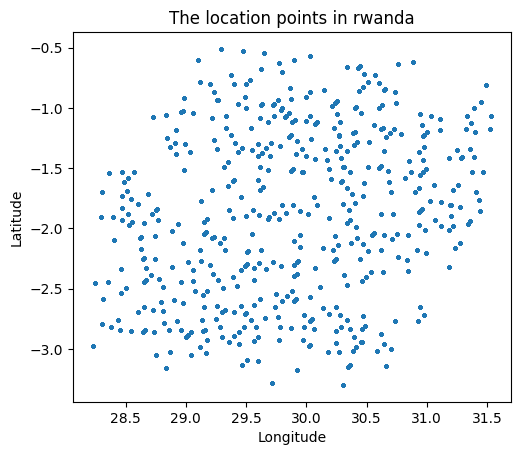

In [6]:
plt.title("The location points in rwanda")
plt.scatter(df.longitude, df.latitude, s=3)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.gca().set_aspect('equal')
plt.show()

Let's analyze the data grouping the emissions and plotting a graph

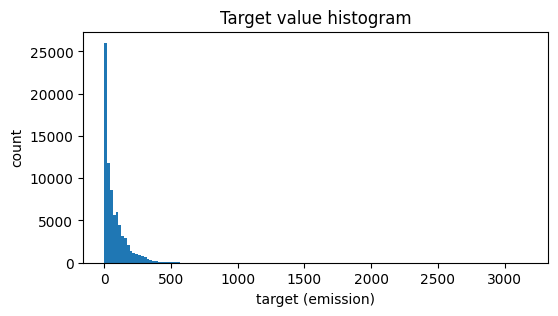

In [7]:
plt.figure(figsize=(6, 3))
plt.hist(df.emission, bins=150)
plt.title('Target value histogram')
plt.xlabel('target (emission)')
plt.ylabel('count')
plt.show()

We can see that most of them have zero `emission`

If we observe the data properly, the emission data fluctuates between 2019, 2020, 2021.
In 2020 the emissions gets reduced, this is hopefully due to covid lockdown.

**Covid 19** is a single unexpected event and can be considered as an outlier.

So we can ignore this time period and make our predictions.




In [8]:
df.groupby(['latitude', 'longitude']).emission.mean().sort_values()

latitude  longitude
-1.682    29.218          0.000000
-2.859    29.041          0.000000
-1.833    28.467          0.000000
-2.841    29.159          0.000000
-1.974    28.526          0.000000
                          ...     
-1.342    31.358        409.606870
-0.956    30.744        455.398039
-1.346    31.254        475.289138
-2.079    29.321       1221.886518
-2.378    29.222       2233.431628
Name: emission, Length: 497, dtype: float64

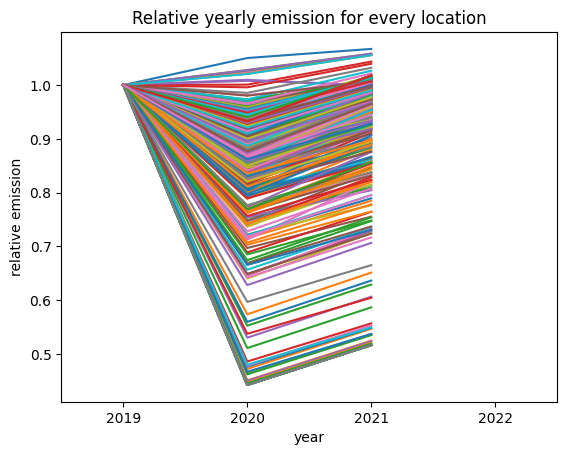

In [9]:
for ll in df[['latitude', 'longitude']].drop_duplicates().iterrows():
    time_series = df[(df.latitude == ll[1].latitude) & (df.longitude == ll[1].longitude)].groupby('year').emission.mean()
    time_series = time_series / time_series.loc[2019]
    plt.plot(time_series.index, time_series)
plt.title('Relative yearly emission for every location')
plt.xlabel('year')
plt.ylabel('relative emission')
plt.xlim(2018.5, 2022.5)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

# Feature distributions

At this point in the notebook, you might expect an analysis of the features.

**The satellite measurements are useless.** These features are terribly noisy and unrelated to the target. A satellite measurement applies only to a single point in time whereas the targets are the CO2 emissions of a whole week. The time of the measurement is determined by the satellite's orbit. Its result depends on clouds, temperature, volcano eruptions and other factors. Furthermore, CO2 emissions come from different sectors (ground traffic, heating, power generation, air traffic, …), and these sectors don't contribute proportionally to NO2, CO or SO2. With a diameter of 200 km, Rwanda is a small country, and the wind replaces Rwanda's whole atmosphere with air from neighboring countries every day.

We'll skip the analysis of these data and note that without the satellite measurements, we have only four features left: latitude, longitude, year and week_no.

# Baseline model

Let's create a very simple baseline model, which only uses the location and the yearly pattern for prediction, i.e., it doesn't look at the satellite's measurements and it doesn't extrapolate any trend. This model doesn't need to impute values because the location and the week are always known. Its prediction for every location and week is simply the average of the emissions of the past years for the same location and week.

We are gonna create a simple baseline model, which uses location and the yearly pattern for prediction, it omits all the satellite emissions since they are noisy and have no significance in predicting the output.

We will just `DecisionTreeRegressor` as our base model

We are using`LeaveOneGroupOut` for cross-validation so that the model is trained on two years to predict the third one.

In [10]:
score_list = []
kf = LeaveOneGroupOut()
for fold, (idx_tr, idx_va) in enumerate(kf.split(df, groups=df.year)):
    X_tr = df.iloc[idx_tr][['longitude', 'latitude', 'week_no']]
    y_tr = df.iloc[idx_tr]['emission']
    X_va = df.iloc[idx_va][['longitude', 'latitude', 'week_no']]
    y_va = df.iloc[idx_va]['emission']

    model = DecisionTreeRegressor(random_state=2) # or DecisionTreeRegressor()
    model.fit(X_tr, y_tr)
    y_va_pred = model.predict(X_va)
    rmse = mean_squared_error(y_va, y_va_pred, squared=False)
    print(f"Fold {fold} year {df.iloc[idx_va].year.iloc[0]}: rmse = {rmse:.2f}")
    score_list.append(rmse)

rmse = sum(score_list) / len(score_list)
print(f"Overall RMSE: {rmse:.2f}")

Fold 0 year 2019: rmse = 20.29
Fold 1 year 2020: rmse = 27.14
Fold 2 year 2021: rmse = 19.77
Overall RMSE: 22.40


## Let's use Radius Neighbour regressor to predict the emission

In [11]:
X = df[feature_columns]
y = df['emission']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=3)

model = RadiusNeighborsRegressor(radius=2)
model.fit(X_train[['longitude', 'latitude', 'week_no', 'year']], y_train)
y_pred = model.predict(X_test[['longitude', 'latitude', 'week_no', 'year']])

radius_rmse = mean_squared_error(y_pred, y_test, squared=False)
print("The RMSE value for RadiusNeighboursRegressor is", radius_rmse)

The RMSE value for RadiusNeighboursRegressor is 148.43982957762086


### Radius neighbour regressor has a high rmse value, since the neighbors have a very different emission value than the current location emission prediction.

**So, the best option is to use DecisionTreeRegressor for our predictions**

# Predicting data
Let's predict the target emission by only taking `longitude`, `latitude`, `week_no` and `year`


In [12]:
X = df[feature_columns]
y = df['emission']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=3)

model = DecisionTreeRegressor(random_state=2)
model.fit(X_train[['longitude', 'latitude', 'week_no', 'year']], y_train)
y_pred_standard = model.predict(X_test[['longitude', 'latitude', 'week_no', 'year']])
X_test_standard = X_test

# submission_standard = pd.Series(y_pred, name='emission', index=X_test.index)
standard_rmse = mean_squared_error(y_pred_standard, y_test, squared=False)
print("The RMSE value for Standard Decision Tree Regressor is", standard_rmse)

The RMSE value for Standard Decision Tree Regressor is 18.951456252347004


# Without extrapolation No Covid Decision Tree Regressor

I admit that manually adjusting predictions may not be the most scientific method. As an alternative, let's simply drop the 53 weeks most affected by Covid as outliers:

In [17]:
# Drop the covid weeks as outliers
train_nocovid = df[(df.year == 2019) |
                       (df.year == 2020) & (df.week_no <= 8) |
                       (df.year == 2021) & (df.week_no > 8)]

X = train_nocovid[feature_columns]
y = train_nocovid['emission']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=3)

model = DecisionTreeRegressor(random_state=2)
model.fit(X_train[['longitude', 'latitude', 'week_no', 'year']], y_train)
y_pred_nocovid = model.predict(X_test[['longitude', 'latitude', 'week_no', 'year']])
X_test_nocovid = X_test

# submission_nocovid = pd.Series(y_pred, name='emission', index=X_test.index)

nocovid_rmse = mean_squared_error(y_pred_nocovid, y_test, squared=False)
print("The RMSE value for No Covid Decision Tree Regressor is", nocovid_rmse)

The RMSE value for No Covid Decision Tree Regressor is 18.573609732881746


Let's compare the three predictions for the test set in a diagram:
- `standard` is based on the full training set, without any extrapolation. Most of the time, these predictions are too low.
- `nocovid` is the result of dropping the Covid weeks in the training data as outliers. These predictions are higher, since covid doesn't impact the results

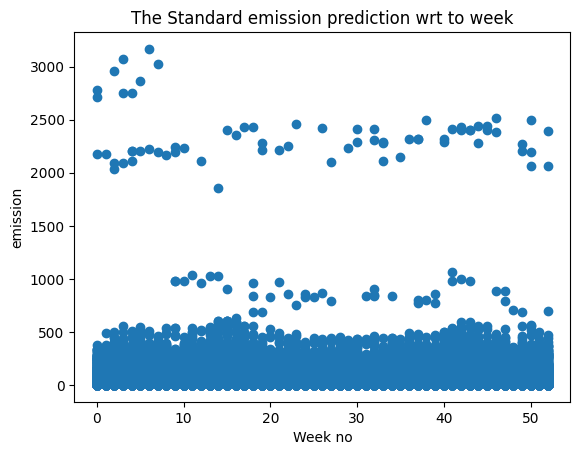

In [14]:
plt.title("The Standard emission prediction wrt to week")
plt.scatter(X_test_standard.week_no, y_pred_standard)
plt.xlabel('Week no')
plt.ylabel('emission')
plt.show()

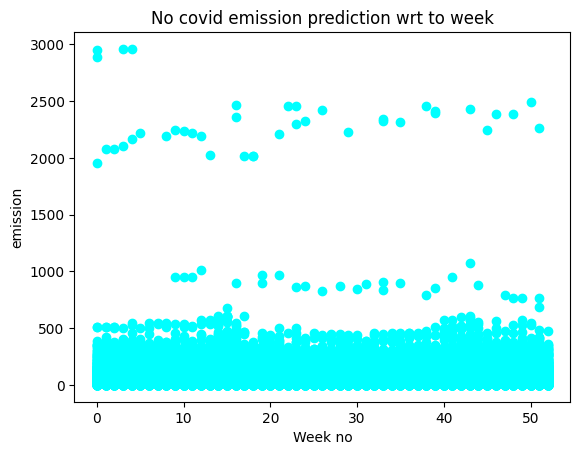

In [15]:
plt.title("No covid emission prediction wrt to week")
plt.scatter(X_test_nocovid.week_no, y_pred_nocovid, color='cyan')
plt.xlabel('Week no')
plt.ylabel('emission')
plt.show()

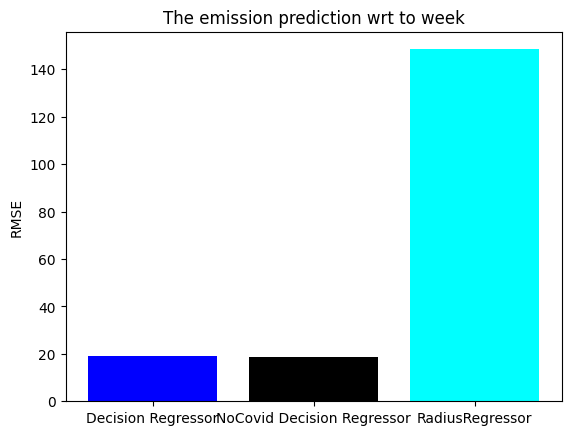

In [16]:
plt.title("The emission prediction wrt to week")
plt.bar(['Decision Regressor', 'NoCovid Decision Regressor', 'RadiusRegressor'], [standard_rmse, nocovid_rmse, radius_rmse],color=['blue', 'black', 'cyan'])
plt.ylabel('RMSE')
# plt.gca().set_aspect('equal')
plt.show()